In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('gambar_nama.jpg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [3]:
mask_red = cv2.inRange(img_hsv, (0,100,100), (10,255,255)) | cv2.inRange(img_hsv, (160,100,100), (180,255,255))
mask_blue = cv2.inRange(img_hsv, (100,100,100), (140,255,255))
mask_green = cv2.inRange(img_hsv, (40,100,100), (80,255,255))

In [4]:
mask_red_blue = mask_red | mask_blue
mask_all = mask_red | mask_blue | mask_green

In [5]:
result_red = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red)
result_red_blue = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_red_blue)
result_all = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_all)

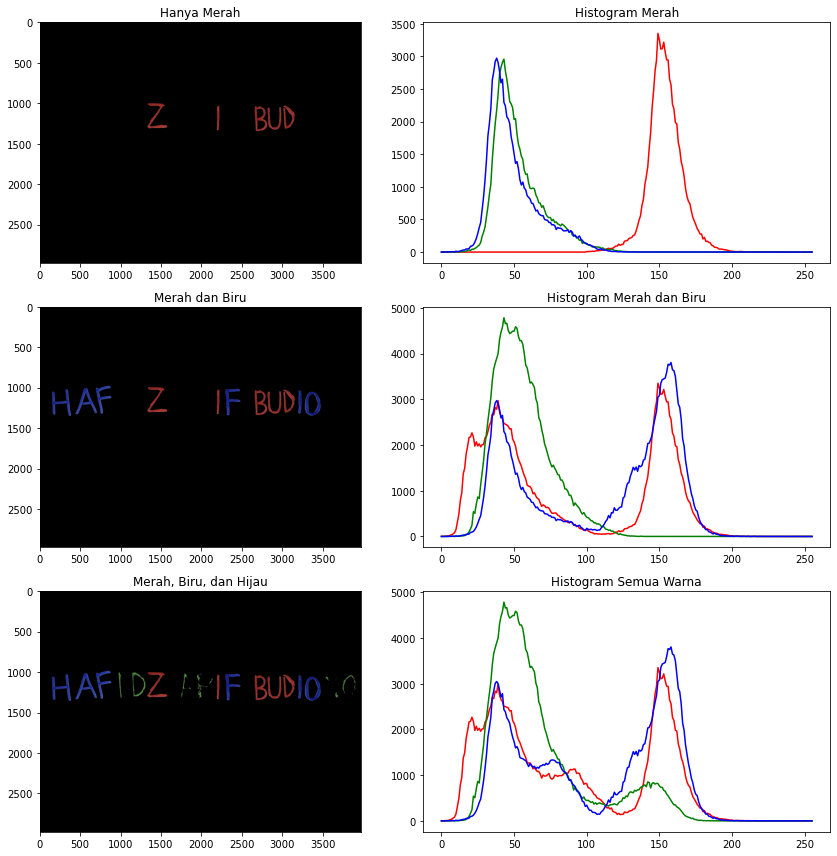

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

axs[0, 0].imshow(result_red)
axs[0, 0].set_title('Hanya Merah')
for i, col in enumerate(['r', 'g', 'b']):
    axs[0, 1].plot(cv2.calcHist([img_rgb], [i], mask_red, [256], [0, 256]), color=col)
axs[0, 1].set_title('Histogram Merah')

axs[1, 0].imshow(result_red_blue)
axs[1, 0].set_title('Merah dan Biru')
for i, col in enumerate(['r', 'g', 'b']):
    axs[1, 1].plot(cv2.calcHist([img_rgb], [i], mask_red_blue, [256], [0, 256]), color=col)
axs[1, 1].set_title('Histogram Merah dan Biru')

axs[2, 0].imshow(result_all)
axs[2, 0].set_title('Merah, Biru, dan Hijau')
for i, col in enumerate(['r', 'g', 'b']):
    axs[2, 1].plot(cv2.calcHist([img_rgb], [i], mask_all, [256], [0, 256]), color=col)
axs[2, 1].set_title('Histogram Semua Warna')

plt.tight_layout()
plt.show()